In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [6]:
traind = np.array(pd.read_csv('dataset/train.csv'))
testd = np.array(pd.read_csv('dataset/test.csv'))

In [7]:
np.random.shuffle(traind)

In [42]:
train_labels, train_pixels = traind[:, 0], traind[:, 1:]

In [43]:
train_labels = np.reshape(train_labels, [-1, 1])

In [44]:
print(train_labels[:5, :])
print(train_pixels[:5, :])

[[9]
 [8]
 [2]
 [2]
 [7]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [45]:
import matplotlib.pyplot as plt

In [46]:
to_show = np.reshape(train_pixels[0, :], [28, 28])

In [47]:
plt.imshow(to_show)

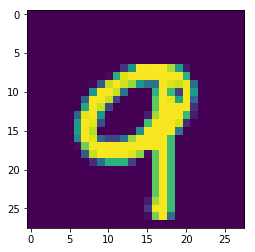

In [48]:
plt.show()

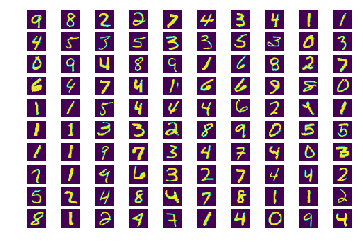

In [49]:
#lets see some more
for i in range(100):
    to_show = np.reshape(train_pixels[i, :], [28, 28])
    at = plt.subplot(10, 10, (i+1))
    at.axis('off')
    plt.imshow(to_show)
plt.show()

In [50]:
print(train_pixels.shape)

(42000, 784)


In [51]:
test_pixels = testd

In [27]:
trainX, trainY, valX, valY = train_pixels[:40000, :], train_labels[:40000, :], train_pixels[40000:, :], train_labels[40000:, :]

In [52]:
#converting to one hot format for variables
trainY, valY = tf.one_hot(trainX, 10), tf.one_hot(valX, 10)

In [53]:
train_tf = tf.data.Dataset.from_tensor_slices((trainX, trainY))
test_tf = tf.data.Dataset.from_tensor_slices((valX, valY))

In [54]:
#batch the val and train data
batch_size = 128
train_tf = train_tf.batch(batch_size)
test_tf = test_tf.batch(batch_size)

In [55]:
iterator = tf.data.Iterator.from_structure(train_tf.output_types, train_tf.output_shapes)

In [56]:
img, label = iterator.get_next()

In [57]:
print(img, label)

Tensor("IteratorGetNext_1:0", shape=(?, 784), dtype=int64) Tensor("IteratorGetNext_1:1", shape=(?, 784, 10), dtype=float32)


In [58]:
train_tf = iterator.make_initializer(train_tf)
test_tf = iterator.make_initializer(test_tf)

In [39]:
# lets declare the weights and biases
w1 = tf.get_variable(name = "weights_l1", shape = [784, 10], initializer=tf.random_normal_initializer(0, 0.1))
b1 = tf.get_variable(name = "bias_l1", shape = [1, 10], initializer = tf.zeros_initializer())

In [59]:
logits = tf.matmul(tf.cast(img, tf.float32), w1) + b1

In [ ]:
result = 